### Import Dependencies

In [87]:
# pip install tensorflow<2.11
# pip install numpy

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random as rd
import keras 

# check for GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


### Splitting the data into training and testing

In [79]:
img_height, img_width = 256,256

BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "..\\..\\..\\data\\",
    validation_split=0.2,
    subset="training",
    seed=123,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE)

test_ds = tf.keras.utils.image_dataset_from_directory(
    "..\\..\\..\\data\\",
    validation_split=0.2,
    subset="validation",
    seed=123,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=BATCH_SIZE)

Found 21 files belonging to 3 classes.
Using 17 files for training.
Found 21 files belonging to 3 classes.
Using 4 files for validation.


### Visualize the data

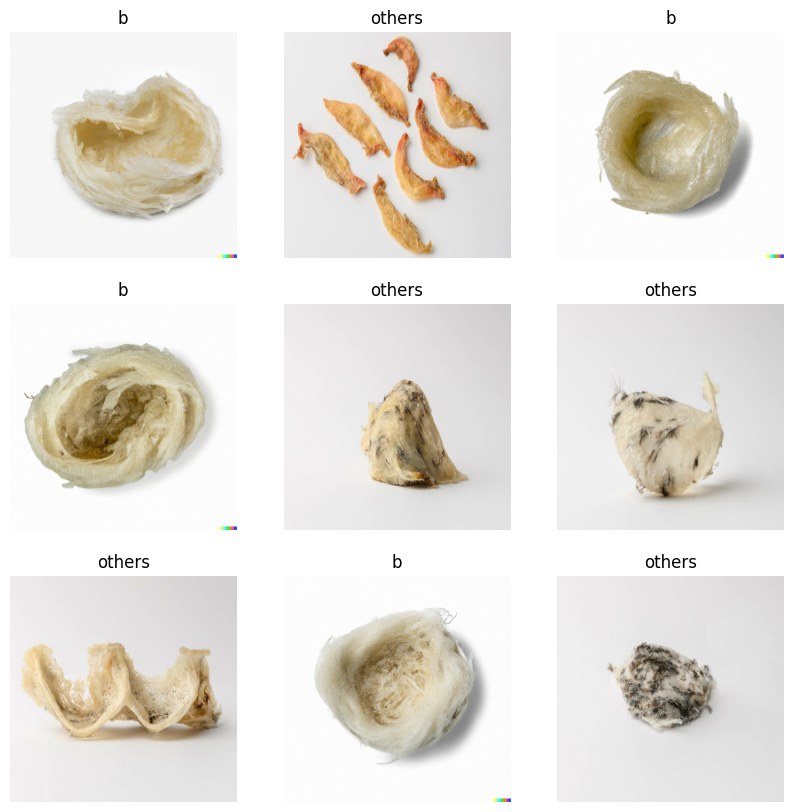

In [80]:
class_names = train_ds.class_names
test = train_ds.take(1)
plt.figure(figsize=(10, 10))

for images, labels in train_ds:
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Compiling the model

In [84]:
resnet_model = tf.keras.Sequential()
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False, input_shape=(256, 256, 3))
resnet_model.add(resnet)
num_classes = 3 # highly depends on how many grades of EBN

resnet_model.add(tf.keras.layers.Flatten())

# 128 neurons because our input data is not a lot
resnet_model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
resnet_model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))

resnet_model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=1e-4), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               16777344  
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 40,365,443
Trainable params: 40,312,323
Non-trainable params: 53,120
_________________________________________________________________


### Training the model

In [85]:
EPOCH = 1
resnet_model.fit(train_ds, epochs=EPOCH) 
resnet_model.save("resnet50model")

1/1 [==============================] - 8s 8s/step - loss: 2.0151 - accuracy: 0.4118


INFO:tensorflow:Assets written to: resnet50model\assets


INFO:tensorflow:Assets written to: resnet50model\assets


### Opening the model and re-using again

In [89]:
# some code of evaluating the model here
model = keras.models.load_model("resnet50model")
test_loss, test_acc = model.evaluate(test_ds)

print('Test accuracy:', test_acc)

1/1 [==============================] - 1s 1s/step - loss: 2.0454 - accuracy: 0.5000
Test accuracy: 0.5


### Evaluating the Model

In [86]:
# some code of evaluating the model here
test_loss, test_acc = resnet_model.evaluate(test_ds)

print('Test accuracy:', test_acc)

1/1 [==============================] - 1s 1s/step - loss: 2.0454 - accuracy: 0.5000
Test accuracy: 0.5
